<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Fixed_and_Random_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fixed and Random Effects**

In [ ]:
# load in required libraries for data analysis
import pandas as pd
import numpy as np

In [ ]:
# read in the data
fname = "/content/drive/MyDrive/Delaware/Summer 2023/ICPSR/MLE 2/Lecture 1: Structure of Multilevel Models/mlbook2_r.dta"
data = pd.read_stata(fname)

data

,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63
2,1,5,33.00,-12.73,-2.37,0,0,1.000,-14.035,-1.4039,0.63
3,1,6,46.00,-4.73,-0.87,0,0,1.000,-14.035,-1.4039,0.63
4,1,7,20.00,-17.73,-3.87,0,0,1.000,-14.035,-1.4039,0.63
...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN


#**Fixed Effects Models**

In [ ]:
# load in library for fixed and random effects
!pip install linearmodels
from linearmodels import PanelOLS

In [ ]:
# estimate the NULL Model
from linearmodels.panel import PanelOLS

# Assuming you have your data loaded into a pandas DataFrame called 'data'
data = data.reset_index()  # Reset index to ensure consecutive index values
data = data.set_index(['schoolnr', 'index'])  # Set a multi-index with 'schoolnr' and 'index' columns

feMod1 = PanelOLS.from_formula('langpost ~ 1 + EntityEffects',
                               data=data)

# Fit the fixed effects model
fe_results = feMod1.fit()

# View the summary of the fixed effects model
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               langpost   R-squared:                     -2.22e-16
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                3758   R-squared (Within):               0.0000
Date:                Tue, Jul 18 2023   R-squared (Overall):              0.0000
Time:                        19:04:09   Log-likelihood                -1.118e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                          --
Entities:                        2490   P-value                               --
Avg Obs:                       1.5092   Distribution:                         --
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):                 --
                            

In [ ]:
### Include Verbal IQ
# Assuming you have your data loaded into a pandas DataFrame called 'data'
feMod2 = PanelOLS.from_formula('langpost ~ 1 + iq_verb + EntityEffects',
                               data=data)

# Fit the fixed effects model
fe_results = feMod2.fit()

# View the summary of the fixed effects model
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               langpost   R-squared:                        0.3685
Estimator:                   PanelOLS   R-squared (Between):             -1.1804
No. Observations:                3758   R-squared (Within):               0.3685
Date:                Tue, Jul 18 2023   R-squared (Overall):             -0.0205
Time:                        19:04:10   Log-likelihood                -1.032e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      739.27
Entities:                        2490   P-value                           0.0000
Avg Obs:                       1.5092   Distribution:                  F(1,1267)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):             739.27
                            

In [ ]:
### Include school-level Verbal IQ
# note here there is multicollienarity and some of the variables have been dropped
# Assuming you have your data loaded into a pandas DataFrame called 'data'
feMod3 = PanelOLS.from_formula('langpost ~ 1 + iq_verb + sch_iqv + EntityEffects',
                               data=data, drop_absorbed = True)

# Fit the fixed effects model
fe_results = feMod3.fit()

# View the summary of the fixed effects model
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               langpost   R-squared:                        0.3685
Estimator:                   PanelOLS   R-squared (Between):             -1.1804
No. Observations:                3758   R-squared (Within):               0.3685
Date:                Tue, Jul 18 2023   R-squared (Overall):             -0.0205
Time:                        19:04:10   Log-likelihood                -1.032e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      739.27
Entities:                        2490   P-value                           0.0000
Avg Obs:                       1.5092   Distribution:                  F(1,1267)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):             739.27
                            

<ipython-input-6-b615f838e617>:8: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

sch_iqv

  fe_results = feMod3.fit()


In [ ]:
# between effects
from linearmodels.panel import BetweenOLS

# Assuming you have your data loaded into a pandas DataFrame called 'data'
beMod1 = BetweenOLS.from_formula('langpost ~ 1', data=data)

# Fit the between effects model
be_results = beMod1.fit()

# View the summary of the between effects model
print(be_results)

                         BetweenOLS Estimation Summary                          
Dep. Variable:               langpost   R-squared:                     -2.22e-16
Estimator:                 BetweenOLS   R-squared (Between):              0.0000
No. Observations:                2490   R-squared (Within):               0.0000
Date:                Tue, Jul 18 2023   R-squared (Overall):              0.0000
Time:                        19:04:10   Log-likelihood                   -9884.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                          --
Entities:                        2490   P-value                               --
Avg Obs:                       1.5092   Distribution:                         --
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):                 --
                            

In [ ]:
# between effects include iq_verb as a variable
# Assuming you have your data loaded into a pandas DataFrame called 'data'
beMod2 = BetweenOLS.from_formula('langpost ~ 1 + iq_verb', data=data)

# Fit the between effects model
be_results = beMod2.fit()

# View the summary of the between effects model
print(be_results)


                         BetweenOLS Estimation Summary                          
Dep. Variable:               langpost   R-squared:                        0.0039
Estimator:                 BetweenOLS   R-squared (Between):              0.0039
No. Observations:                2490   R-squared (Within):              -0.5721
Date:                Tue, Jul 18 2023   R-squared (Overall):             -0.3652
Time:                        19:04:10   Log-likelihood                   -9879.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.7307
Entities:                        2490   P-value                           0.0018
Avg Obs:                       1.5092   Distribution:                  F(1,2488)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):             9.7307
                            

#**Random Effects**

In [ ]:
# null model
from linearmodels.panel import RandomEffects

# Assuming you have your data loaded into a pandas DataFrame called 'dataSchools'
reMod1 = RandomEffects.from_formula('langpost ~ 1', data=data)
re_results = reMod1.fit()

# View the summary of the random effects model
print(re_results)

                        RandomEffects Estimation Summary                        
Dep. Variable:               langpost   R-squared:                       -0.0802
Estimator:              RandomEffects   R-squared (Between):              0.0000
No. Observations:                3758   R-squared (Within):               0.0000
Date:                Tue, Jul 18 2023   R-squared (Overall):              0.0000
Time:                        19:04:10   Log-likelihood                -1.342e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                          --
Entities:                        2490   P-value                               --
Avg Obs:                       1.5092   Distribution:                         --
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):                 --
                            

In [ ]:
# include variable verbal IQ

reMod2 = RandomEffects.from_formula('langpost ~ 1 + iq_verb', data=data)
re_results = reMod2.fit()

# View the summary of the random effects model
print(re_results)

                        RandomEffects Estimation Summary                        
Dep. Variable:               langpost   R-squared:                        0.0930
Estimator:              RandomEffects   R-squared (Between):             -0.0227
No. Observations:                3758   R-squared (Within):               0.3669
Date:                Tue, Jul 18 2023   R-squared (Overall):             -0.3809
Time:                        19:04:10   Log-likelihood                 -1.25e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      385.19
Entities:                        2490   P-value                           0.0000
Avg Obs:                       1.5092   Distribution:                  F(1,3756)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):             622.78
                            

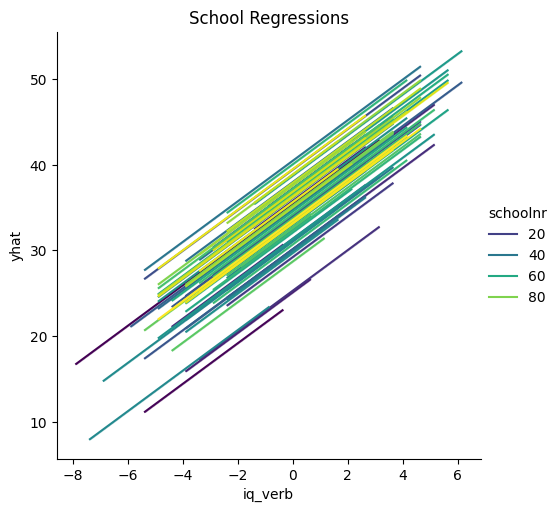

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the necessary data and the random effects model 'reMod2' already fitted

# Obtain the random effects
res_school = re_results.estimated_effects
res_school = res_school.reset_index()
res_school = res_school.drop(columns = 'index')

# # Join random effects with the original data
data = data.merge(res_school, on='schoolnr')

# # Calculate yhat
data['yhat'] = (re_results.params[0] + data['estimated_effects']) + (re_results.params[1] * data['iq_verb'])

# # Filter data for plotting
filtered_data = data[data['schoolnr'] < 100]

# # Plot school-specific regression lines
fig42 = sns.relplot(data=filtered_data, x='iq_verb', y='yhat', hue='schoolnr', kind='line', palette='viridis')
fig42.set(title='School Regressions')
plt.show()
